In [1]:
#Importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [2]:
#Reading in the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data = df
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploratory Data Analysis

In [3]:
#Counting the number of surived and dead patients in the dataset
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [4]:
# Counting the number of ones and zeros (death event)
ones_count = df['DEATH_EVENT'].value_counts().get(1, 0)
zeros_count = df['DEATH_EVENT'].value_counts().get(0, 0)

print("Number of patients dead:", ones_count)
print("Number of patients survived:", zeros_count)
#2.114 times more zeros

Number of patients dead: 96
Number of patients survived: 203


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()

# Printing the count of missing values
print("Missing values:\n", missing_values)

Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [6]:
#Checking for NA values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
# To check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#Shape of Dataset
df.shape


(299, 13)

In [9]:
#Summary of Dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
# Check the data types of columns
data_types = df.dtypes
print(data_types)


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [11]:
# Identifying categorical variables
categorical_vars = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        categorical_vars.append(column)

# Identifying the continuous variables
continuous_vars = []
for column in df.columns:
    if column not in categorical_vars and df[column].dtype in ['int64', 'float64']:
        continuous_vars.append(column)

print("Categorical Variables:")
print(categorical_vars)

print("Continuous Variables:")
print(continuous_vars)

Categorical Variables:
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Continuous Variables:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


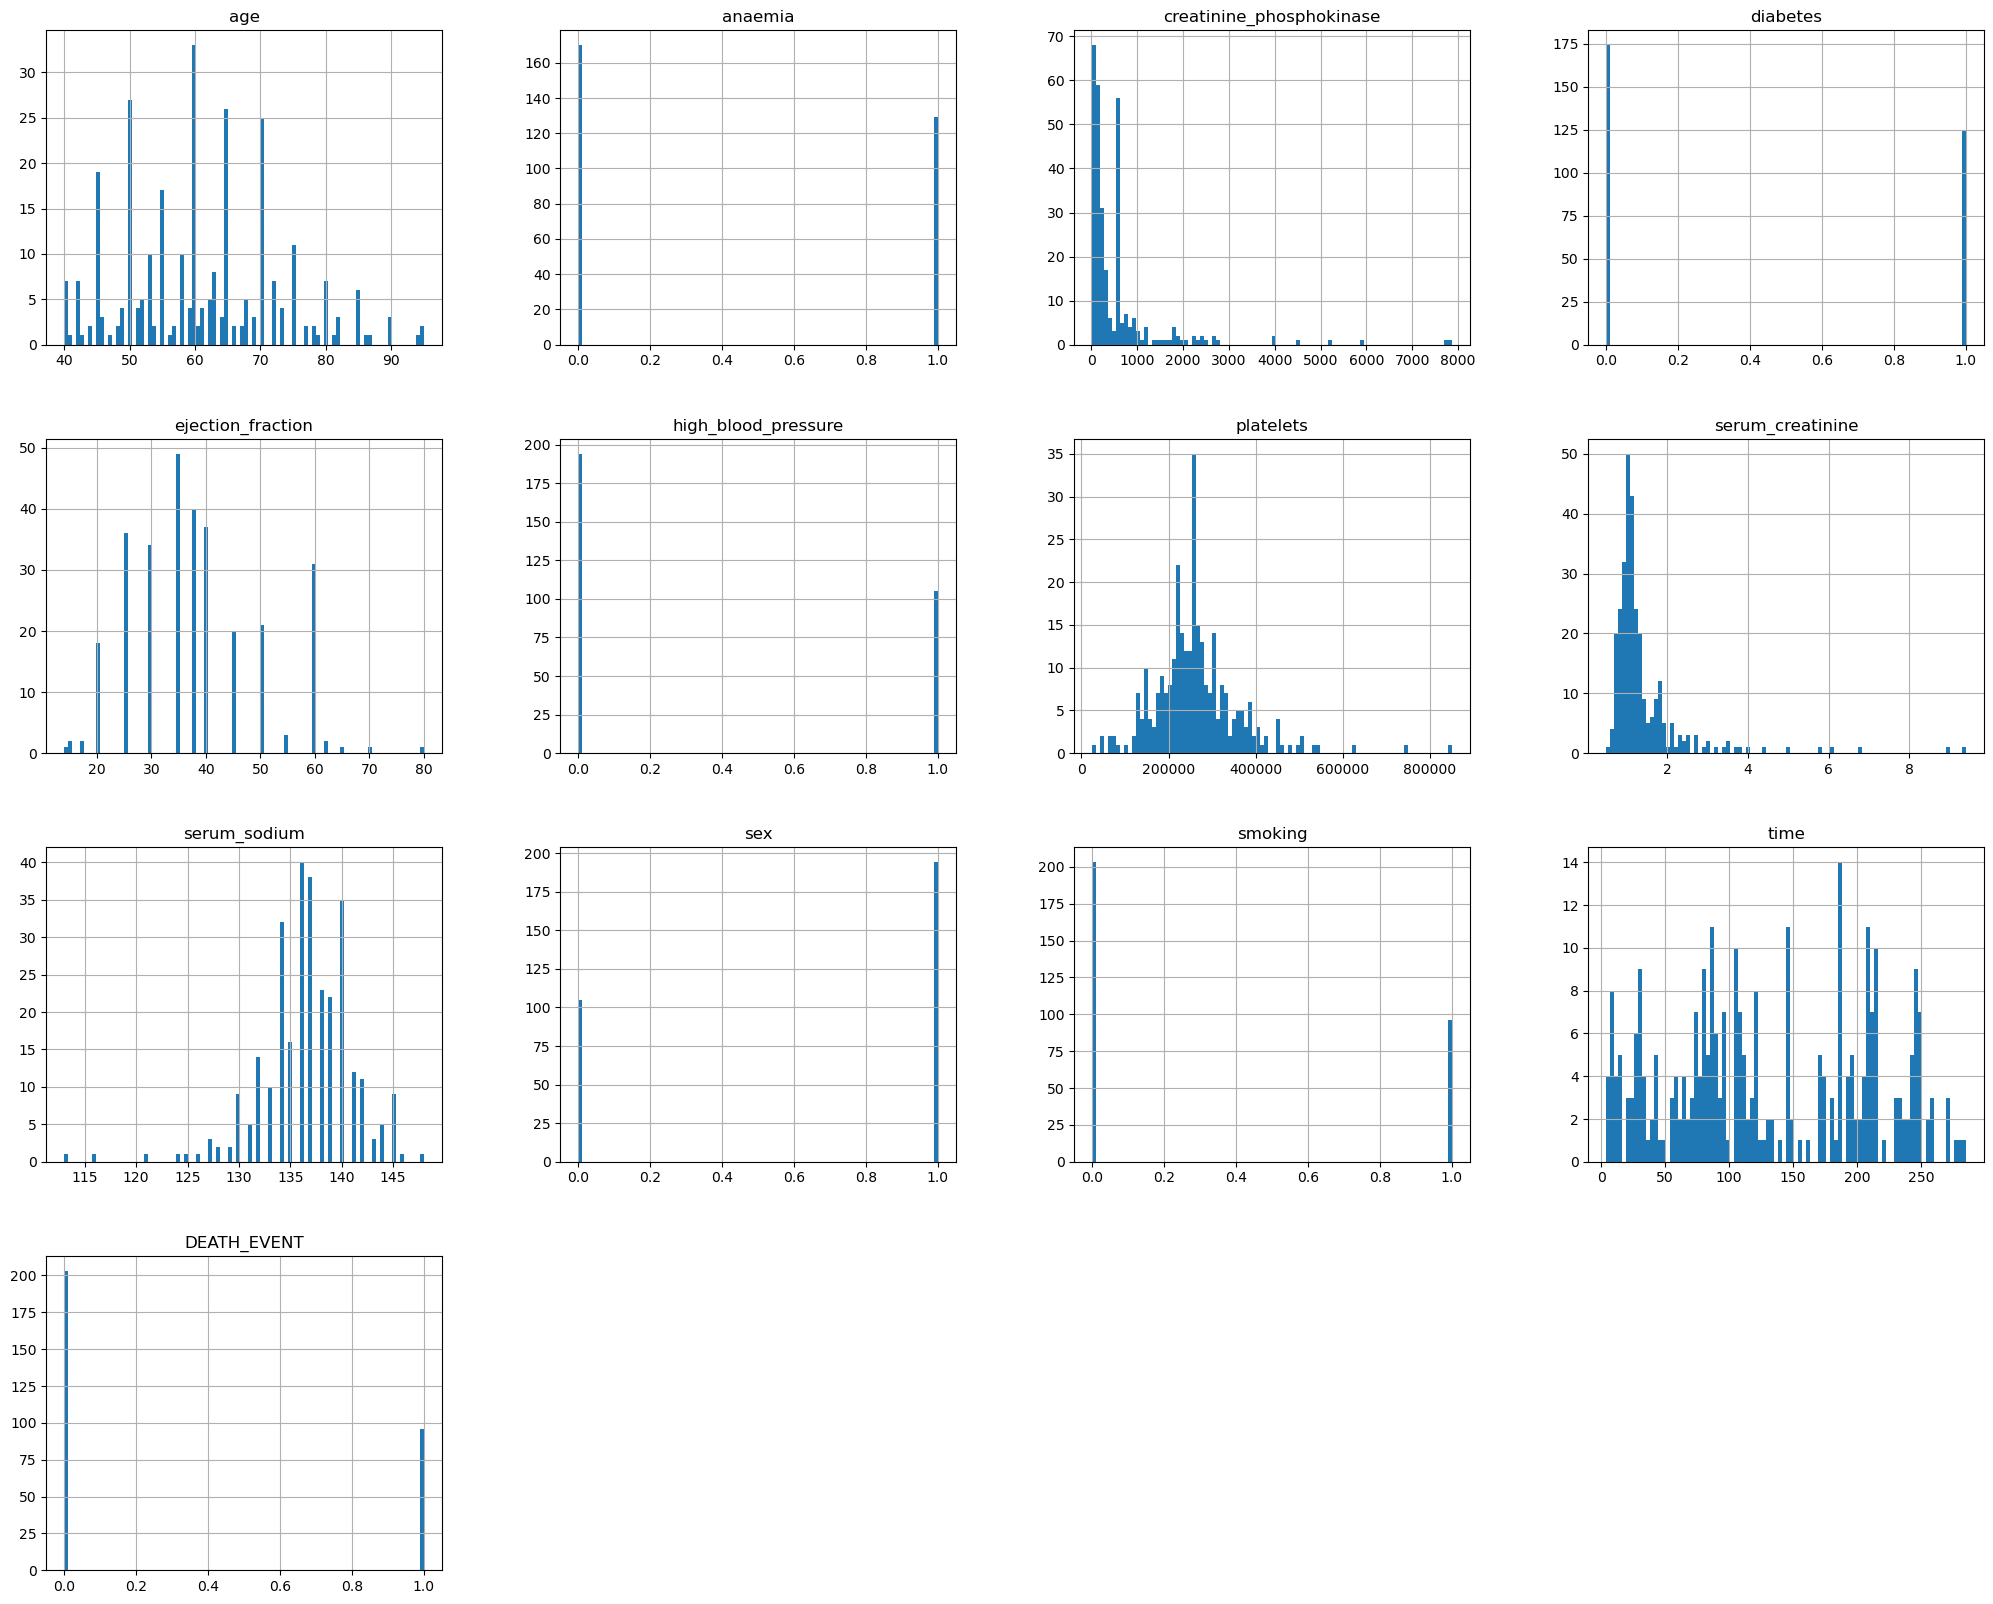

In [12]:
 #plotting histograms for all the features in the dataset.
df.hist(bins=90, figsize=(25, 20))
plt.show()

,DEATH_EVENT,time,serum_sodium,serum_creatinine,platelets,ejection_fraction,creatinine_phosphokinase,age
DEATH_EVENT,1.000000,-0.526964,-0.195204,0.294278,-0.049139,-0.268603,0.062728,0.253729
time,-0.526964,1.000000,0.087640,-0.149315,0.010514,0.041729,-0.009346,-0.224068
serum_sodium,-0.195204,0.087640,1.000000,-0.189095,0.062125,0.175902,0.059550,-0.045966
serum_creatinine,0.294278,-0.149315,-0.189095,1.000000,-0.041198,-0.011302,-0.016408,0.159187
platelets,-0.049139,0.010514,0.062125,-0.041198,1.000000,0.072177,0.024463,-0.052354
ejection_fraction,-0.268603,0.041729,0.175902,-0.011302,0.072177,1.000000,-0.044080,0.060098
creatinine_phosphokinase,0.062728,-0.009346,0.059550,-0.016408,0.024463,-0.044080,1.000000,-0.081584
age,0.253729,-0.224068,-0.045966,0.159187,-0.052354,0.060098,-0.081584,1.000000


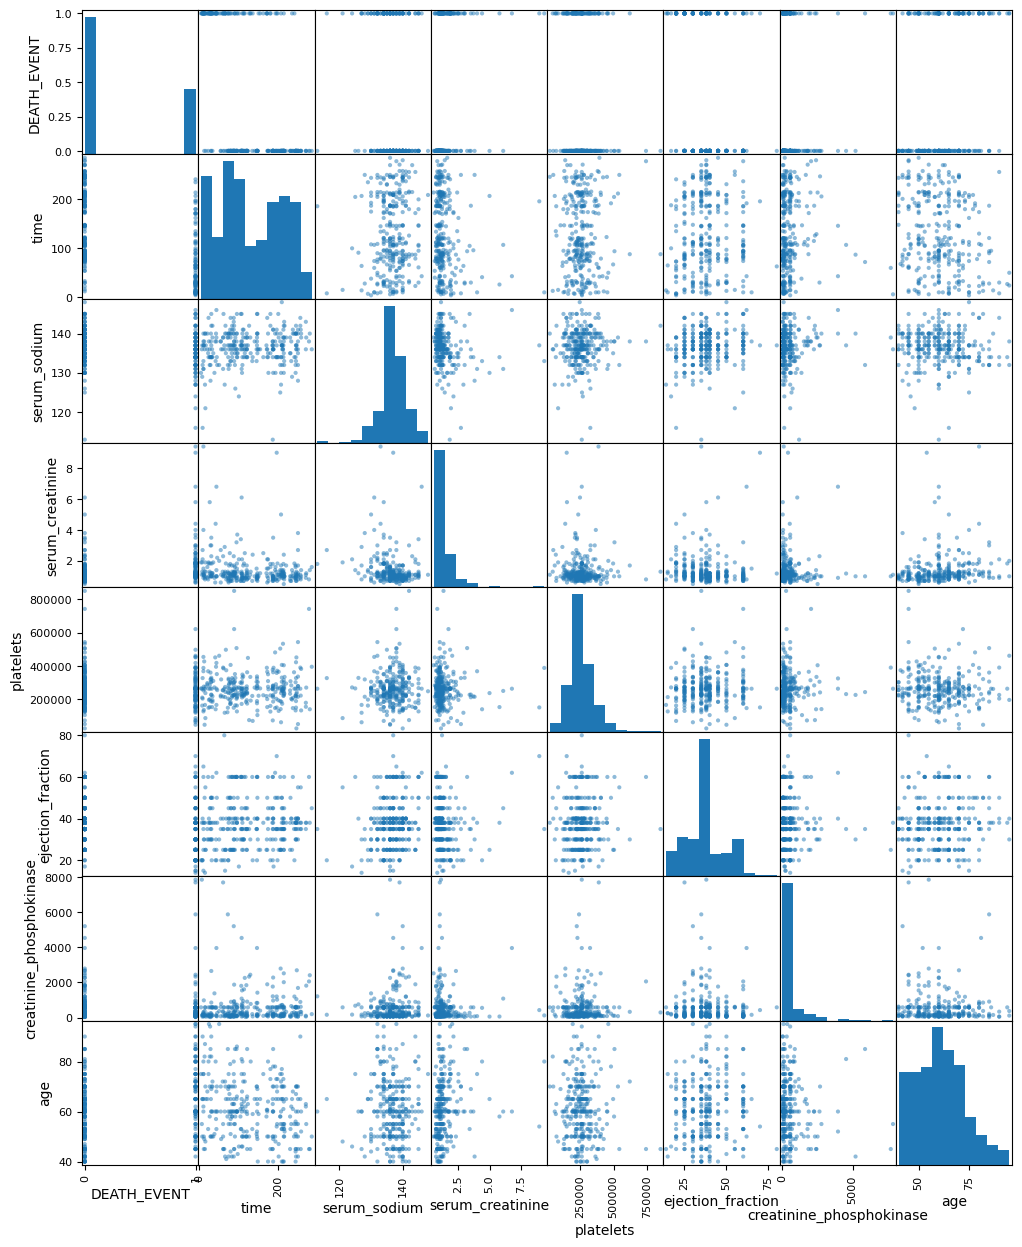

In [13]:
#Scatter matrix 
pd.plotting.scatter_matrix(df[['DEATH_EVENT','time','serum_sodium','serum_creatinine', 'platelets',
                                  'ejection_fraction','creatinine_phosphokinase','age']], figsize=(12,15)); df[['DEATH_EVENT','time','serum_sodium','serum_creatinine',
                                        'platelets','ejection_fraction','creatinine_phosphokinase','age']].corr()

In [14]:
#Dropping time column from the dataset
df = df.drop('time', axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Splitting the Dataset

The dataset is split into X and y variables where 'y' is the target variable. The dataset is further split into training and test sets so as to build models and check for their accuracy and other metrics.

In [15]:
# Selecting the features (X) and target variable (y)
X = df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [16]:
from sklearn.model_selection import train_test_split

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

# 30% of the data will be used for testing, and 70% for training.
#'random_state' parameter is used to ensure reproducibility of the split.

# Displaying the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (209, 11)
X_test shape: (90, 11)
y_train shape: (209,)
y_test shape: (90,)


In [17]:
#Function which gives all the metrics of a model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [18]:
#Function for creating ROC curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

### Feature Selection

In [19]:
# Variance of features in the dataset
variances = data.var()
variances

age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64

In [20]:
# Sorting the variances variable in descending order to identify the features with the highest variances
sorted_variances = variances.sort_values(ascending=False)
sorted_variances

platelets                   9.565669e+09
creatinine_phosphokinase    9.414586e+05
time                        6.023965e+03
age                         1.414865e+02
ejection_fraction           1.400635e+02
serum_sodium                1.946996e+01
serum_creatinine            1.070211e+00
anaemia                     2.461224e-01
diabetes                    2.441023e-01
high_blood_pressure         2.286144e-01
sex                         2.286144e-01
smoking                     2.187156e-01
DEATH_EVENT                 2.187156e-01
dtype: float64

In [21]:
# Number of top features to keep
k = 6 
selected_features = sorted_variances[:k].index.tolist()
selected_features

['platelets',
 'creatinine_phosphokinase',
 'time',
 'age',
 'ejection_fraction',
 'serum_sodium']

In [22]:
#Creating dataset with selected features based on variances and adding label column as well to df_selected
df_selected = data[selected_features]
d=data['DEATH_EVENT']
df_selected = df_selected.copy() # To remove warning of slicing
df_selected['DEATH_EVENT'] = d.values
df_selected.head()

,platelets,creatinine_phosphokinase,time,age,ejection_fraction,serum_sodium,DEATH_EVENT
0,265000.00,582,4,75.0,20,130,1
1,263358.03,7861,6,55.0,38,136,1
2,162000.00,146,7,65.0,20,129,1
3,210000.00,111,7,50.0,20,137,1
4,327000.00,160,8,65.0,20,116,1


### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.proportion import proportion_confint


num_att = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
bin_att = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

class DataFrameSelector(BaseEstimator):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_att)),
    ('std_scaler', StandardScaler())
])

bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(bin_att))
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("bin_pipeline", bin_pipeline)
])

X_train_ = full_pipeline.fit_transform(X_train)
X_test_ = full_pipeline.transform(X_test)

### SMOTE on the dataset

SMOTE is done on the dataset so as to create new training datasets which will have equal distribution of both the classes in the target variable.

In [24]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### KNN model

In [25]:
#KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

0.6111111111111112


col_0,0,1
DEATH_EVENT,,
0,47,14
1,21,8


In [27]:
generate_model_report(y_test, y_pred_knn)

Accuracy =  0.6111111111111112
Precision =  0.36363636363636365
Recall =  0.27586206896551724
F1 Score =  0.3137254901960784


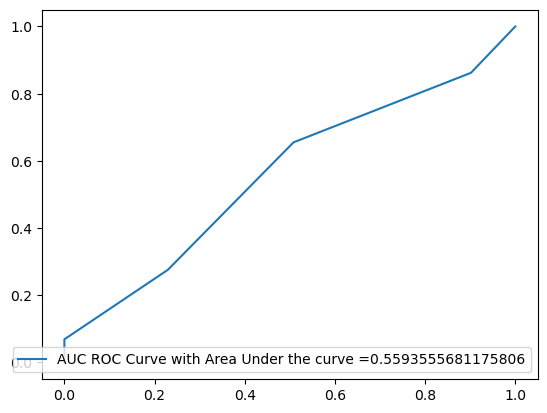

In [28]:
generate_auc_roc_curve(knn_model,X_test)

### KNN with Scaling


In [29]:
knn_model.fit(X_train_,y_train)
knn_model.score(X_test_,y_test)

0.7666666666666667

In [30]:
y_pred_scaled = knn_model.predict(X_test_)
print(accuracy_score(y_test,y_pred_scaled))
pd.crosstab(y_test,y_pred_knn)

0.7666666666666667


col_0,0,1
DEATH_EVENT,,
0,47,14
1,21,8


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_knn_ = knn_model.predict(X_test_)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_knn_)
recall = recall_score(y_test, y_pred_knn_)
f1 = f1_score(y_test, y_pred_knn_)

# Print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7222222222222222
Recall: 0.4482758620689655
F1 Score: 0.5531914893617021


In [32]:
#Fix the above - check if correct

### With SMOTE

In [33]:
knn_model.fit(x_train_res, y_train_res)
knn_model.score(X_test,y_test)

0.5444444444444444

In [34]:
Y_Test_Pred_knn = knn_model.predict(X_test)
generate_model_report(y_test, Y_Test_Pred_knn)

Accuracy =  0.5444444444444444
Precision =  0.3695652173913043
Recall =  0.5862068965517241
F1 Score =  0.4533333333333333


### Logistic Regression


In [35]:
#Importing package for Logistic Regression model
from sklearn.linear_model import LogisticRegression
#Building the logistic regression model
log_r = LogisticRegression().fit(X_train, y_train)
Y_Test_Pred = log_r.predict(X_test)
pd.crosstab(Y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,58,18
1,3,11


In [36]:
#Classification Metric of Logistic Regression model
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.7666666666666667
Precision =  0.7857142857142857
Recall =  0.3793103448275862
F1 Score =  0.5116279069767441


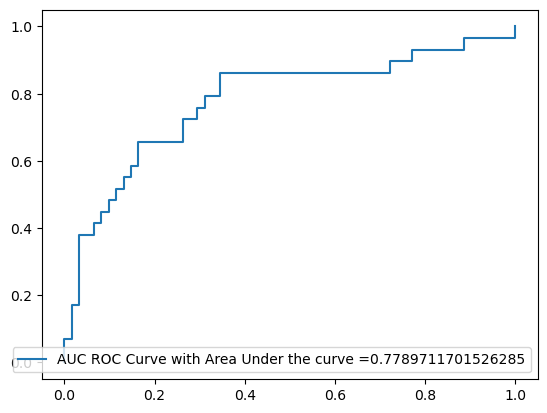

In [37]:
generate_auc_roc_curve(log_r, X_test)

### Scaling

In [38]:
#Importing package for Logistic Regression model
from sklearn.linear_model import LogisticRegression
#Building the logistic regression model
log_sc = LogisticRegression().fit(X_train_, y_train)
Y_Test_Predn = log_sc.predict(X_test_)
pd.crosstab(Y_Test_Predn, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,55,14
1,6,15


In [39]:
#Classification Metric of Logistic Regression model
generate_model_report(y_test, Y_Test_Predn)

Accuracy =  0.7777777777777778
Precision =  0.7142857142857143
Recall =  0.5172413793103449
F1 Score =  0.6000000000000001


In [40]:
#Fix this

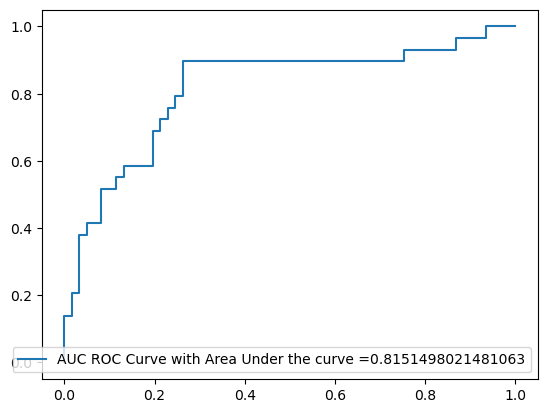

In [41]:
generate_auc_roc_curve(log_sc, X_test_)

### Logistic Regression with SMOTE

In [42]:
#Logistic Regression model with smote training sets
lr_smote_model = LogisticRegression().fit(x_train_res, y_train_res)
Y_test_Pred = lr_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,40,6
1,21,23


In [43]:
generate_model_report(y_test, Y_test_Pred)

Accuracy =  0.7
Precision =  0.5227272727272727
Recall =  0.7931034482758621
F1 Score =  0.6301369863013699


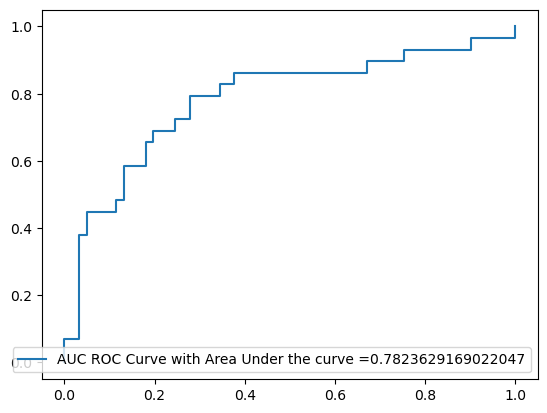

In [44]:
generate_auc_roc_curve(lr_smote_model,X_test)

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=40)

# Training the classifier on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_predrf = rf_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7222222222222222


In [46]:
generate_model_report(y_test, y_predrf)

Accuracy =  0.7222222222222222
Precision =  0.6111111111111112
Recall =  0.3793103448275862
F1 Score =  0.46808510638297873


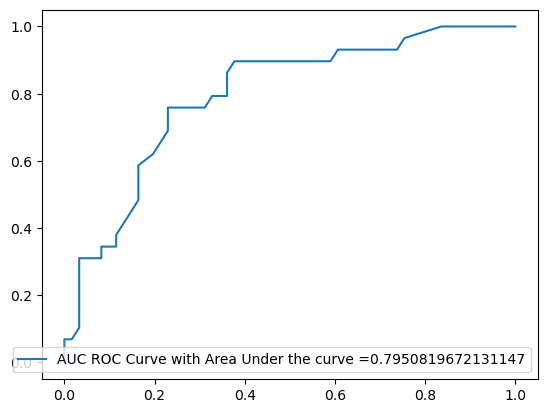

In [47]:
generate_auc_roc_curve(rf_model, X_test)

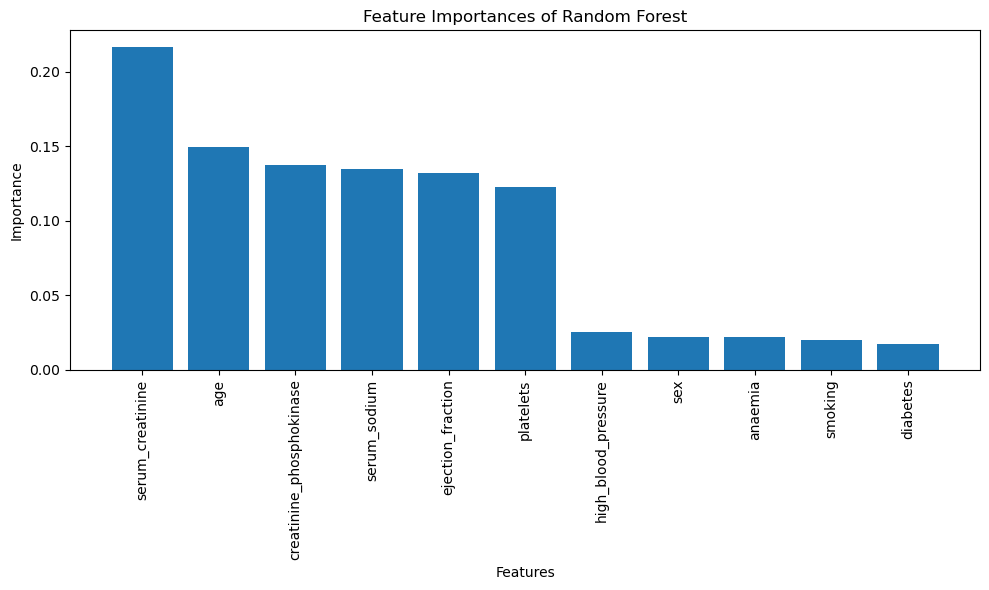

In [48]:
# Extract feature importances for Random Forest Classifier
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
feature_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Random Forest")
plt.bar(range(X.shape[1]), feature_importances[feature_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[feature_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Random Forest with SMOTE

In [49]:
rf_smote_model = rf_model.fit(x_train_res, y_train_res)
Y_test_Pred_rf = rf_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_rf, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,48,10
1,13,19


In [50]:
generate_model_report(y_test, Y_test_Pred_rf)

Accuracy =  0.7444444444444445
Precision =  0.59375
Recall =  0.6551724137931034
F1 Score =  0.6229508196721311


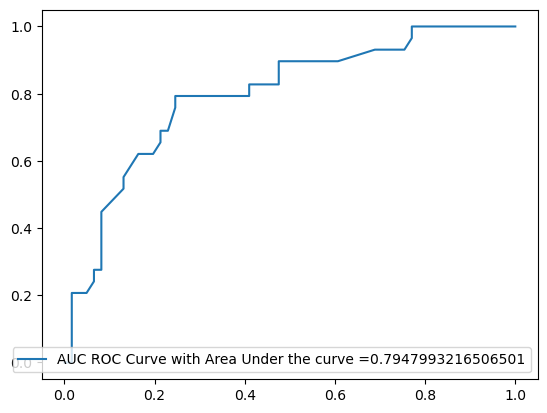

In [51]:
generate_auc_roc_curve(rf_smote_model, X_test)

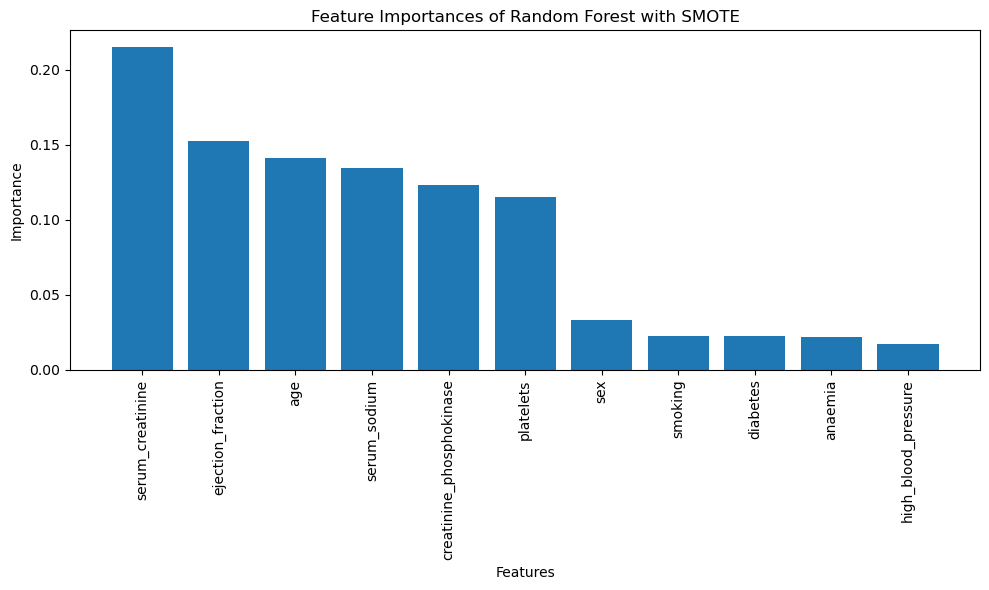

In [52]:
#Feature Importance of Random Forest Classifier with SMOTE
feature_importances_smote = rf_smote_model.feature_importances_

# Sort feature importances in descending order
feature_indices_smote = np.argsort(feature_importances_smote)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Random Forest with SMOTE")
plt.bar(range(X.shape[1]), feature_importances_smote[feature_indices_smote], align="center")
plt.xticks(range(X.shape[1]), X.columns[feature_indices_smote], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=40)

# Training the classifier on the training data
dt_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.6888888888888889


In [54]:
generate_model_report(y_test, y_pred_dt)

Accuracy =  0.6888888888888889
Precision =  0.5172413793103449
Recall =  0.5172413793103449
F1 Score =  0.5172413793103449


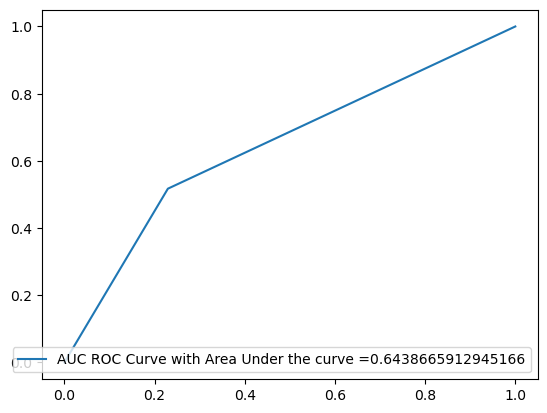

In [55]:
generate_auc_roc_curve(dt_model, X_test)

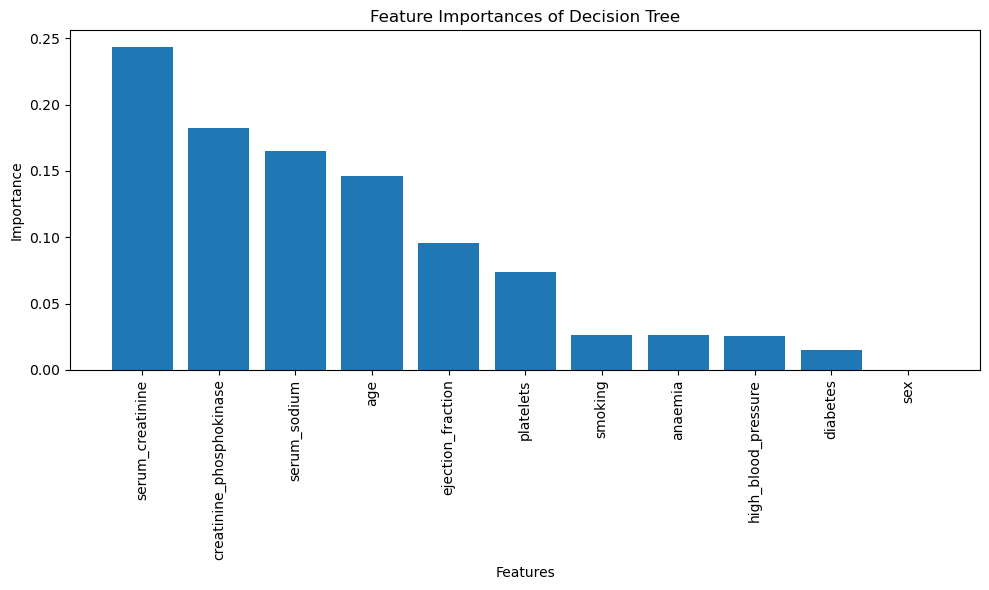

In [56]:
#Feature Importance of Decision Tree Classifier
importances = dt_model.feature_importances_

# Sorting feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Decision Tree with SMOTE

In [57]:
dt_smote_model = dt_model.fit(x_train_res, y_train_res)
Y_test_Pred_dt = dt_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_dt, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,36,10
1,25,19


In [58]:
generate_model_report(y_test, Y_test_Pred_dt)

Accuracy =  0.6111111111111112
Precision =  0.4318181818181818
Recall =  0.6551724137931034
F1 Score =  0.5205479452054794


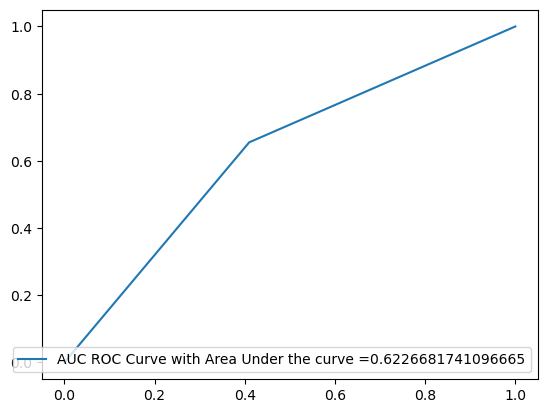

In [59]:
generate_auc_roc_curve(dt_smote_model, X_test)

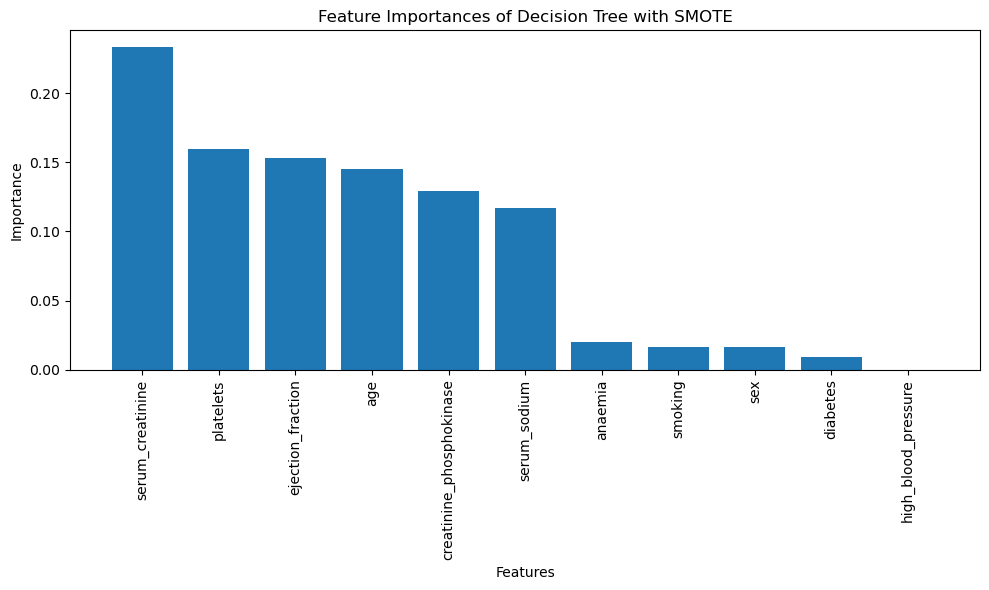

In [60]:
importances_smote = dt_smote_model.feature_importances_

# Sort feature importances in descending order
indices_smote = np.argsort(importances_smote)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Decision Tree with SMOTE")
plt.bar(range(X.shape[1]), importances_smote[indices_smote], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_smote], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### SVM

In [61]:
from sklearn.svm import SVC

# Creating an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=40)

# Training the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculating the accuracy of the model
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", acc)


Accuracy: 0.6777777777777778


In [62]:
generate_model_report(y_test, y_pred_svm)

Accuracy =  0.6777777777777778
Precision =  0.5
Recall =  0.06896551724137931
F1 Score =  0.1212121212121212


In [63]:
print(metrics.classification_report(y_test, y_pred = y_pred_svm ))

              precision    recall  f1-score   support

           0       0.69      0.97      0.80        61
           1       0.50      0.07      0.12        29

    accuracy                           0.68        90
   macro avg       0.59      0.52      0.46        90
weighted avg       0.63      0.68      0.58        90



### Scaling

In [64]:
# Training the classifier on the training data
svm_classifier.fit(X_train_, y_train)

# Making predictions on the test data
y_pred_svm_sc = svm_classifier.predict(X_test_)

# Calculating the accuracy of the model
acc1 = accuracy_score(y_test, y_pred_svm_sc)
print("Accuracy:", acc1)

Accuracy: 0.7555555555555555


In [65]:
generate_model_report(y_test, y_pred_svm_sc)

Accuracy =  0.7555555555555555
Precision =  0.6666666666666666
Recall =  0.4827586206896552
F1 Score =  0.56


#### RBF

In [66]:
# Creating an SVM rbf classifier
svm_classifier_rad = SVC(kernel='rbf', random_state=40)

# Training the classifier on the training data
svm_classifier_rad.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm_rad = svm_classifier_rad.predict(X_test)

# Calculating the accuracy of the model
acc_rad = accuracy_score(y_test, y_pred_svm_rad)
print("Accuracy:", acc_rad)

Accuracy: 0.6777777777777778


In [67]:
generate_model_report(y_test, y_pred_svm_rad)
#Implies imbalance due to parameters being zero

Accuracy =  0.6777777777777778
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Scaling

In [68]:
# Training the classifier on the training data
svm_classifier_rad.fit(X_train_, y_train)

# Making predictions on the test data
y_pred_svm_rad_sc = svm_classifier_rad.predict(X_test_)

# Calculating the accuracy of the model
acc_rad_sc = accuracy_score(y_test, y_pred_svm_rad_sc)
print("Accuracy:", acc_rad_sc)

Accuracy: 0.7555555555555555


In [69]:
generate_model_report(y_test, y_pred_svm_rad_sc)

Accuracy =  0.7555555555555555
Precision =  0.6521739130434783
Recall =  0.5172413793103449
F1 Score =  0.576923076923077


### SVM with SMOTE

In [70]:
#Linear
svm_smote_model = svm_classifier.fit(x_train_res, y_train_res)
Y_test_Pred_svm = svm_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_svm, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,43,10
1,18,19


In [71]:
generate_model_report(y_test, Y_test_Pred_svm)

Accuracy =  0.6888888888888889
Precision =  0.5135135135135135
Recall =  0.6551724137931034
F1 Score =  0.5757575757575758


In [72]:
#Radial
svm_rad_smote_model = svm_classifier_rad.fit(x_train_res, y_train_res)
Y_test_Pred_rad = svm_rad_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_rad, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,56,26
1,5,3


In [73]:
generate_model_report(y_test, Y_test_Pred_rad)

Accuracy =  0.6555555555555556
Precision =  0.375
Recall =  0.10344827586206896
F1 Score =  0.16216216216216217


### Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
# Creating a Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Fitting the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)


Accuracy: 0.6444444444444445


In [75]:
generate_model_report(y_test, y_pred_nb)

Accuracy =  0.6444444444444445
Precision =  0.3333333333333333
Recall =  0.10344827586206896
F1 Score =  0.15789473684210528


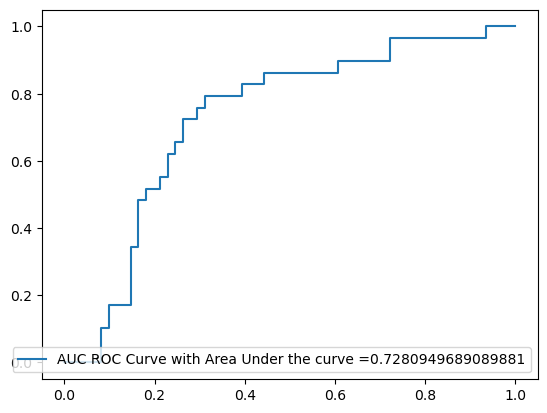

In [76]:
generate_auc_roc_curve(naive_bayes_model, X_test)

### With SMOTE

In [77]:
# Fitting the model with SMOTE
smote_nb = naive_bayes_model.fit(x_train_res, y_train_res)

# Make predictions on the test set
y_smote_nb = smote_nb.predict(X_test)

# Evaluate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_smote_nb)
print("Accuracy:", accuracy_nb)


Accuracy: 0.6888888888888889


In [78]:
generate_model_report(y_test, y_smote_nb)

Accuracy =  0.6888888888888889
Precision =  0.52
Recall =  0.4482758620689655
F1 Score =  0.48148148148148145


### Rough Work

In [79]:
# Relationship b/w blood pressure and DEATH_EVENT
import statsmodels.api as sm

# Create a logistic regression model
logreg_model = sm.Logit(y, X[['high_blood_pressure']])

# Fit the model
result = logreg_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Based on results,we can infer that having high blood pressure (high_blood_pressure) is statistically associated with
#a decreased likelihood of the DEATH_EVENT occurrence.

Optimization terminated successfully.
         Current function value: 0.681406
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            0
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                -0.08561
Time:                        19:29:24   Log-Likelihood:                -203.74
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
high_blood_pressure    -0.5261      0.202     -2.605      0.009      -0.922      -0.130


In [80]:
# Relationship b/w smoking and DEATH_EVENT
import statsmodels.api as sm

# Create a logistic regression model
logreg_model = sm.Logit(y, X[['smoking']])

# Fit the model
result = logreg_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# The p-value is below the conventional significance level of 0.05, suggesting that the smoking feature
#has a significant effect on the likelihood of the DEATH_EVENT occurrence.

#Based on these results, we can infer that smoking (smoking) is statistically associated 
#with a decreased likelihood of the DEATH_EVENT occurrence.

Optimization terminated successfully.
         Current function value: 0.670011
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            0
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                -0.06745
Time:                        19:29:24   Log-Likelihood:                -200.33
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
smoking       -0.7885      0.220     -3.581      0.000      -1.220      -0.357


In [81]:
# Relationship b/w diabetes and DEATH_EVENT
import statsmodels.api as sm

# Create a logistic regression model
logreg_model = sm.Logit(y, X[['diabetes']])

# Fit the model
result = logreg_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

#the p-value is below the conventional significance level of 0.05, suggesting that the diabetes feature has a significant
#effect on the likelihood of the DEATH_EVENT occurrence.

#Based on these results, we can infer that having diabetes (diabetes) is statistically associated 
#with a decreased likelihood of the DEATH_EVENT occurrence.

Optimization terminated successfully.
         Current function value: 0.665439
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            0
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                -0.06017
Time:                        19:29:24   Log-Likelihood:                -198.97
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diabetes      -0.7538      0.192     -3.931      0.000      -1.130      -0.378


In [82]:
# Relationship b/w sex and DEATH_EVENT
import statsmodels.api as sm

# Create a logistic regression model
logreg_model = sm.Logit(y, X[['sex']])

# Fit the model
result = logreg_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

#The coefficient of the sex feature is -0.7557. This means that being male (represented by the value 1 for the sex feature)
#is associated with a decrease in the log-odds of the DEATH_EVENT occurrence
#compared to being female (represented by the value 0 for the sex feature).

#The associated p-value is less than 0.05, indicating that the observed association 
#between sex and the DEATH_EVENT outcome is statistically significant.

#Since the coefficient is negative, it suggests that being male is associated with a lower likelihood of experiencing 
#the DEATH_EVENT compared to being female.

Optimization terminated successfully.
         Current function value: 0.649942
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            0
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                -0.03548
Time:                        19:29:24   Log-Likelihood:                -194.33
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.7557      0.154     -4.908      0.000      -1.057      -0.454


In [83]:
# Relationship b/w anaemia and DEATH_EVENT
import statsmodels.api as sm

# Create a logistic regression model
logreg_model = sm.Logit(y, X[['anaemia']])

# Fit the model
result = logreg_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

#The associated p-value is less than 0.05, indicating that the observed association between anaemia
#and the DEATH_EVENT outcome is statistically significant.

#The coefficient of the anaemia feature is -0.5902. This means that having anaemia 
#(represented by the value 1 for the anaemia feature) is associated with a decrease in the log-odds
#of the DEATH_EVENT occurrence compared to not having anaemia (represented by the value 0 for the anaemia feature).

#Since the coefficient is negative, it suggests that having anaemia is associated with a lower likelihood of experiencing 
#the DEATH_EVENT compared to not having anaemia.

Optimization terminated successfully.
         Current function value: 0.675149
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            0
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                -0.07564
Time:                        19:29:24   Log-Likelihood:                -201.87
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
anaemia       -0.5902      0.184     -3.211      0.001      -0.950      -0.230


In [84]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# Assuming you have your features in X and target variable in y
# Select the number of top features you want to keep
k = 5

# Perform ANOVA F-value test
kbest_f = SelectKBest(score_func=f_classif, k=k)
X_selected_f = kbest_f.fit_transform(X, y)
selected_feature_indices_f = kbest_f.get_support(indices=True)

# Perform Chi-square test
kbest_chi2 = SelectKBest(score_func=chi2, k=k)
X_selected_chi2 = kbest_chi2.fit_transform(X, y)
selected_feature_indices_chi2 = kbest_chi2.get_support(indices=True)

# Perform Mutual Information test
kbest_mutual_info = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected_mutual_info = kbest_mutual_info.fit_transform(X, y)
selected_feature_indices_mutual_info = kbest_mutual_info.get_support(indices=True)

# Get the selected feature names for each test
selected_feature_names_f = [X.columns[i] for i in selected_feature_indices_f]
selected_feature_names_chi2 = [X.columns[i] for i in selected_feature_indices_chi2]
selected_feature_names_mutual_info = [X.columns[i] for i in selected_feature_indices_mutual_info]

# Print the selected feature names for each test
print("Top", k, "features selected by ANOVA F-value test:", selected_feature_names_f)
print("Top", k, "features selected by Chi-square test:", selected_feature_names_chi2)
print("Top", k, "features selected by Mutual Information test:", selected_feature_names_mutual_info)


Top 5 features selected by ANOVA F-value test: ['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium']
Top 5 features selected by Chi-square test: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine']
Top 5 features selected by Mutual Information test: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'smoking']


In [85]:
#Random Forests feature selection using accuracy reduction

from sklearn.feature_selection import SelectFromModel
# Perform feature selection
feat_selector = SelectFromModel(estimator=rf_model, threshold='mean')
select_features = feat_selector.fit_transform(X, y)

# Get the selected feature indices
select_feature_indices = feat_selector.get_support(indices=True)

# Get the selected feature names
select_feature_names = X.columns[select_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in select_feature_names:
    print(feature)


Selected Features:
age
creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium


In [86]:
# Get feature importances
feature_importance = rf_model.feature_importances_

# Sorting the feature importances in descending order
sort_indices = np.argsort(feature_importance)[::-1]

# Displaying feature importance ranking
for idx in sort_indices:
    print(f"Feature: {X_train.columns[idx]}, Importance: {feature_importance[idx]}")

Feature: serum_creatinine, Importance: 0.21563231438467034
Feature: ejection_fraction, Importance: 0.15237514241756422
Feature: age, Importance: 0.14095531916130566
Feature: serum_sodium, Importance: 0.13482004052236035
Feature: creatinine_phosphokinase, Importance: 0.1232417338223955
Feature: platelets, Importance: 0.11539426631885129
Feature: sex, Importance: 0.033261793384602945
Feature: smoking, Importance: 0.02273821375120187
Feature: diabetes, Importance: 0.02229637197963111
Feature: anaemia, Importance: 0.021944288591158146
Feature: high_blood_pressure, Importance: 0.01734051566625869


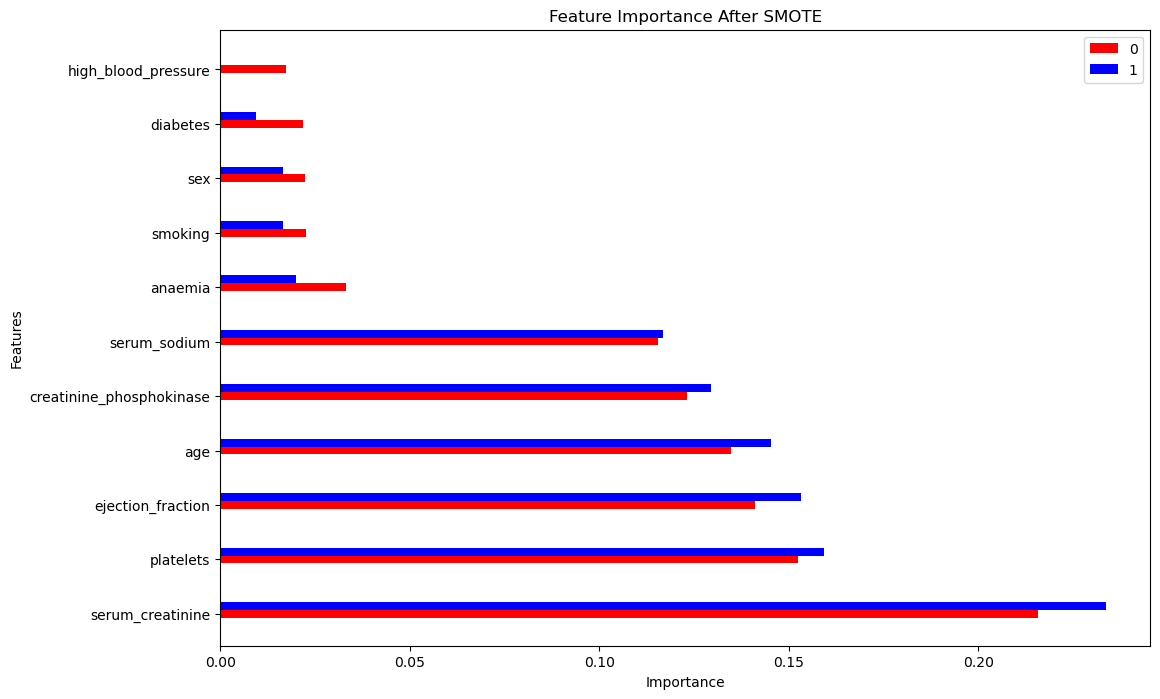

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of trained models called 'models'
models = [rf_smote_model, dt_smote_model, log_sc, knn_model, svm_classifier, svm_classifier_rad, naive_bayes_model]  # Replace with your actual models

# Get the feature names from your dataset (assuming you have a variable 'features' with the feature names)
feature_names = df.columns

# Plot the feature importance for each individual model in one graph
plt.figure(figsize=(12, 8))

colors = ['#FF0000', '#0000FF']  # Red and Blue colors

for i, model in enumerate(models):
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_

        sorted_indices = np.argsort(feature_importance)[::-1]
        sorted_feature_importance = feature_importance[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        plt.barh(
            np.arange(len(sorted_feature_names)) + i / len(models),
            sorted_feature_importance,
            color=colors[i % len(colors)],
            height=1 / len(models),
            label=str(i)  # Use model index as label if model_names is not defined
        )

plt.title('Feature Importance After SMOTE')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.yticks(np.arange(len(sorted_feature_names)), sorted_feature_names)
plt.legend(loc='upper right')

# Save the plot to a file
plt.savefig('feature_importance_smote.png', bbox_inches='tight', dpi=1200)

plt.show()


In [ ]:
# Assuming you have a list of trained models called 'models'
models = [rf_smote_model, dt_smote_model, log_sc, knn_model, svm_classifier, svm_classifier_rad, naive_bayes_model]  # Replace with your actual models

# Get the feature names from your dataset (assuming you have a variable 'features' with the feature names)
feature_names = df.columns

# Plot the feature importance for each individual model in one graph
plt.figure(figsize=(12, 8))

colors = ['#FF0000', '#0000FF']  # Red and Blue colors

for i, model in enumerate(models):
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_

        sorted_indices = np.argsort(feature_importance)[::-1]
        sorted_feature_importance = feature_importance[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        plt.barh(
            np.arange(len(sorted_feature_names)) + i / len(models),
            sorted_feature_importance,
            color=colors[i % len(colors)],
            height=1 / len(models),
            label=model_names[i]
        )

plt.title('Feature Importance After SMOTE', fontsize=18)  # Adjust the font size of the title
plt.xlabel('Importance', fontsize=16)  # Adjust the font size of the x-label
plt.ylabel('Features', fontsize=16)  # Adjust the font size of the y-label
plt.yticks(np.arange(len(sorted_feature_names)), sorted_feature_names, fontsize=12)  # Adjust the font size of the y-tick labels
plt.legend(loc='upper right', fontsize=12)  # Adjust the font size of the legend
plt.savefig('feature_importance_smote1.png', bbox_inches='tight', dpi=1200)
plt.show()


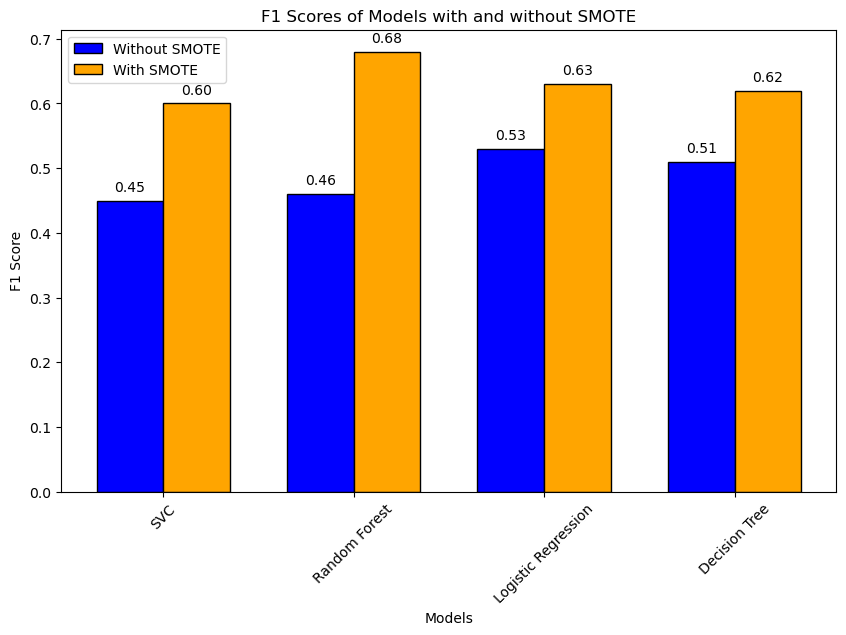

In [93]:
# Assuming you have a list of F1 scores for each model with and without SMOTE
f1_scores_without_smote = [0.45, 0.46, 0.53, 0.51]
f1_scores_with_smote = [0.60, 0.68, 0.63, 0.61]

# Assuming you have a list of model names
model_names = [ 'SVC', 'Random Forest', 'Logistic Regression', 'Decision Tree']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1_scores_without_smote))
r2 = [x + bar_width for x in r1]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the F1 scores without SMOTE
ax.bar(r1, f1_scores_without_smote, color='blue', width=bar_width, edgecolor='black', label='Without SMOTE')

# Plot the F1 scores with SMOTE
ax.bar(r2, f1_scores_with_smote, color='orange', width=bar_width, edgecolor='black', label='With SMOTE')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Models with and without SMOTE')
ax.set_xticks([r + bar_width/2 for r in range(len(f1_scores_without_smote))])
ax.set_xticklabels(model_names, rotation=45)

# Display the F1 scores above the bars
for i in range(len(f1_scores_without_smote)):
    ax.text(r1[i], f1_scores_without_smote[i] + 0.01, f"{f1_scores_without_smote[i]:.2f}", ha='center', va='bottom')
    ax.text(r2[i], f1_scores_with_smote[i] + 0.01, f"{f1_scores_with_smote[i]:.2f}", ha='center', va='bottom')

# Move the legend to the top left corner
ax.legend(loc='upper left')

# Save and show the figure
plt.savefig('f1_scores.png', bbox_inches='tight', dpi=1200)
plt.show()
